# Assessing feature importance via random decision forests
***

## 1 Dataset: Contraceptive Method Choice


### 1.1 Description
This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of interview. The problem is to predict the current contraceptive method choice (no use, long-term methods, or short-term methods) of a woman based on her demographic and socio-economic characteristics.


### 1.2 Attribute Information:

1. Wife's age (numerical) 
2. Wife's education (categorical) 1=low, 2, 3, 4=high 
3. Husband's education (categorical) 1=low, 2, 3, 4=high 
4. Number of children ever born (numerical) 
5. Wife's religion (binary) 0=Non-Islam, 1=Islam 
6. Wife's now working? (binary) 0=Yes, 1=No 
7. Husband's occupation (categorical) 1, 2, 3, 4 
8. Standard-of-living index (categorical) 1=low, 2, 3, 4=high 
9. Media exposure (binary) 0=Good, 1=Not good 
10. Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-term

### 1.3 Link 
https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice

***
## 2 Load libraries and dataset

### 2.1 Import libraries

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Display graphics in Jupyter Notebook
%matplotlib inline

### 2.2 Load .csv file

In [15]:
dataset = pd.read_csv('cmc.csv')

# Show 5 rows
dataset.head(5)

,wifeAge,wifeEducation,husbandEducation,children,wifeReligion,wifeWorking,husbandOccupation,stdLiving,mediaExposure,contraceptiveMethod
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


***
## 3. Split dataset in train and test subsets

In [16]:
# Values of target
y = dataset['contraceptiveMethod'].values

# Values of attributes
dataset = dataset.drop(['contraceptiveMethod'], axis=1)
X = dataset.values

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

***
## 4. Random Forest Classifier

In [17]:
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train) # fit model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

***
## 5 Assessing feature importance
### 5.1 Create data frame with feature and related importance

In [18]:
result = pd.DataFrame()
result['feature'] = dataset.columns # column's names
result['importance'] = forest.feature_importances_ # values
result.sort_values(by=['importance'], ascending=False, inplace=True)
result

,feature,importance
0,wifeAge,0.349325
3,children,0.227783
6,husbandOccupation,0.089501
7,stdLiving,0.089312
1,wifeEducation,0.082592
2,husbandEducation,0.065574
5,wifeWorking,0.044941
4,wifeReligion,0.034456
8,mediaExposure,0.016516


### 5.2 Display results in bar chart

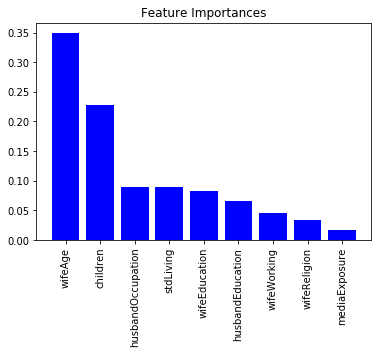

In [20]:
plt.title('Feature Importances')
plt.bar(range(len(result['feature'])), result['importance'], color='blue', align='center')
plt.xticks(range(len(result['feature'])), result['feature'], rotation=90)

plt.show()

***
## 6 Conclusion
"Feature importance" measure based on Gini Importance or Mean Deacrease in Impurity (MDI), provided by Random Forest Classifier, allows us to  say that "wifeAge" and "children" features are very important to correctly label new entries. In otherhand, "mediaExposure" maybe could be taken apart from the analysis.